## Plot an AM-DSB-SC modulated singal using an 10KHz carrier signal and an 1KHz modulating wave. 

## Signal Description: 

AM - Amplitude modulation
DSB - Double Side Band
SC - Supressed carrier

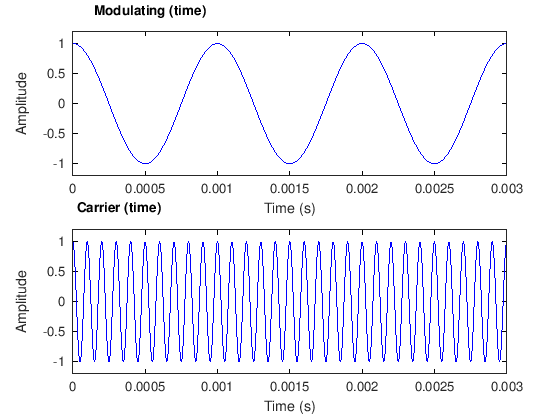

In [17]:
clc; clear all; close all

% Defining the signals amplitude. 
A_modulating = 1;
A_carrier = 1;

% Defining the signals frequency
f_modulating = 1000;
f_carrier = 10000;

% Defining the period and frequency of sampling: 
fs = 50*f_carrier;
Ts = 1/fs;
T = 1/f_modulating;

% Defining the sinal period. 
t_inicial = 0;
t_final = 2;

% "t" vector: correspondente ao periodo de análise (dominio da frequência); 
t = [t_inicial:Ts:t_final];

% Defining the signals in the time domain:

modulating_signal = A_modulating*cos(2*pi*f_modulating*t);

carrier_signal = A_carrier*cos(2*pi*f_carrier*t);

figure(1)
subplot(211)
plot(t,modulating_signal,'b')
xlim([0 3*T])
ylim([-1.2*A_modulating 1.2*A_modulating])
annotation('textbox', [0.05, 0.95, 1, 1], 'string', 'Modulating (time)', 'HorizontalAlignment', 'right', 'LineStyle', 'none', 'FontSize', 8, 'FontWeight', 'bold')

xlabel('Time (s)')
ylabel('Amplitude')

subplot(212)
plot(t,carrier_signal, 'b')
xlim([0 3*T])
ylim([-1.2*A_carrier 1.2*A_carrier])
annotation('textbox', [0.05, 0.48, 1, 1], 'string', 'Carrier (time)', 'HorizontalAlignment', 'right', 'LineStyle', 'none', 'FontSize', 8, 'FontWeight', 'bold')
xlabel('Time (s)')
ylabel('Amplitude')

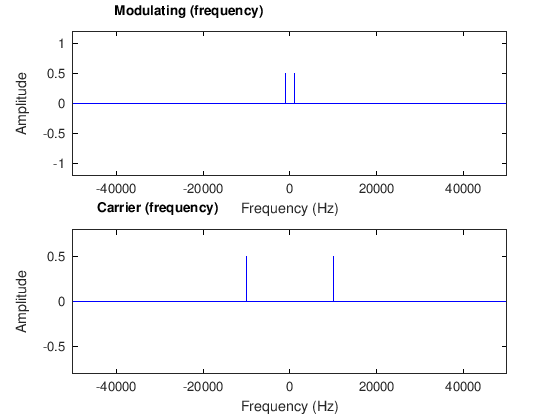

In [18]:
% calculando o passo no dominio da frequência; 
f_step = 1/t_final;

% vetor "f" correspondente ao periodo de análise (dominio da frequência); 
f = [-fs/2:f_step:fs/2];

% realizando a FFT (fast Fourier Transform) do sinal para o domínio da frequência; 
modulating_F = fft(modulating_signal)/length(modulating_signal);
modulating_F = fftshift(modulating_F);

carrier_F = fft(carrier_signal)/length(carrier_signal);
carrier_F = fftshift(carrier_F);

figure(2)

subplot(211)
plot(f,abs(modulating_F), 'b')
xlim([-5*f_carrier 5*f_carrier])
ylim([-1.2*A_modulating 1.2*A_modulating])
annotation('textbox', [0.05, 0.95, 1, 1], 'string', 'Modulating (frequency)', 'HorizontalAlignment', 'right', 'LineStyle', 'none', 'FontSize', 8, 'FontWeight', 'bold')
xlabel('Frequency (Hz)')
ylabel('Amplitude')

subplot(212)
plot(f,abs(carrier_F), 'b')
xlim([-5*f_carrier 5*f_carrier])
ylim([-0.8*A_carrier 0.8*A_carrier])
annotation('textbox', [0.05, 0.48, 1, 1], 'string', 'Carrier (frequency)', 'HorizontalAlignment', 'right', 'LineStyle', 'none', 'FontSize', 8, 'FontWeight', 'bold')
xlabel('Frequency (Hz)')
ylabel('Amplitude')


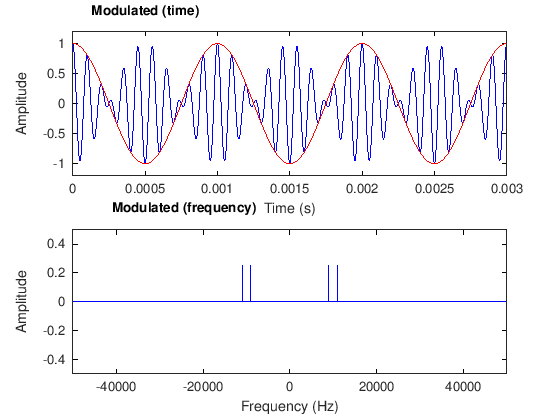

In [19]:
final_signal = modulating_signal .* carrier_signal;

final_F = fft(final_signal)/length(final_signal);
final_F = fftshift(final_F);

figure(3)

% Subplot 1
subplot(211)
plot(t,final_signal, 'b')
xlim([0 3*T])
hold on
plot(t,modulating_signal, 'r')
xlim([0 3*T])
ylim([-1.2*A_modulating 1.2*A_modulating])
annotation('textbox', [0.05, 0.95, 1, 1], 'string', 'Modulated (time)', 'HorizontalAlignment', 'right', 'LineStyle', 'none', 'FontSize', 8, 'FontWeight', 'bold')
xlabel('Time (s)')
ylabel('Amplitude')

% Subplot 2
subplot(212)
plot(f,abs(final_F), 'b')
xlim([-5*f_carrier 5*f_carrier])
ylim([-0.5*A_modulating 0.5*A_modulating])
annotation('textbox', [0.05, 0.48, 1, 1], 'string', 'Modulated (frequency)', 'HorizontalAlignment', 'right', 'LineStyle', 'none', 'FontSize', 8, 'FontWeight', 'bold')
xlabel('Frequency (Hz)')
ylabel('Amplitude')



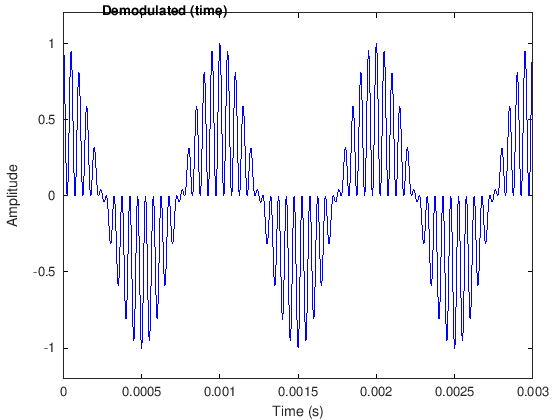

In [20]:
demulated_signal = final_signal .* carrier_signal; 

figure(4)

plot(t,demulated_signal,'b')
xlim([0 3*T])
ylim([-1.2*A_modulating 1.2*A_modulating])
annotation('textbox', [0.05, 0.95, 1, 1], 'string', 'Demodulated (time)', 'HorizontalAlignment', 'right', 'LineStyle', 'none', 'FontSize', 8, 'FontWeight', 'bold')
xlabel('Time (s)')
ylabel('Amplitude')
